## CNN

### Convolutionl Layerのスクラッチ実装

In [32]:
# ライブラリ
import torch
import torchvision
import numpy
from torchvision import transforms
import matplotlib.pyplot as plt
import pandas as pd

In [38]:
dataset = torchvision.datasets.MNIST(root='./mnist_data/', train=True, download=True)
im, label = dataset[0]
# PIL -> tensor
# 白黒なので2rankにする
im = transforms.ToTensor()(im)[0, :, :]


In [39]:
# 白黒なので2rankにする
im.shape

torch.Size([28, 28])

TypeError: Invalid shape (28,) for image data

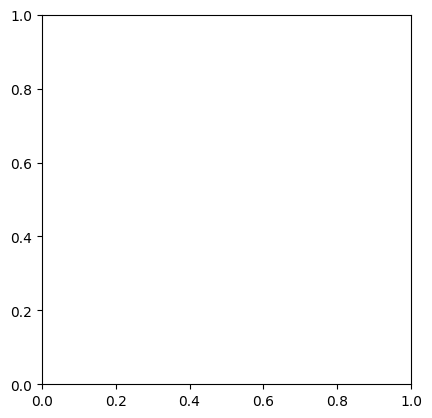

In [40]:
# たしかえmr
plt.imshow(im[0], cmap='gray')

In [48]:
# 画像の縦横
im_h, im_w = im.shape
# filterの縦横
f_h, f_w = top_edge_filter.shape
print(im_h, im_w)
print(f_h, f_w)


28 28
3 3


In [49]:
# upper edge fileter
top_edge_filter = torch.tensor([[-1, -1, -1], 
                                [0,0,0], 
                                [1,1,1]])


In [52]:
# filterを動かす -> for文 -> たてとよこ-> 2重ループ
# 行
output_data = []
for i in range(im_h - f_h + 1):
    # 横
    row = []
    for j in range(im_w - f_w + 1):
        # フィルターに適用する入力データを抽出して、フィルターと要素ごとの掛け算して総和
        row.append((im[i:i + f_h, j:j+f_w] * top_edge_filter).sum().item())
    output_data.append(row)

        

In [55]:
torch.tensor(output_data).shape

torch.Size([26, 26])

In [65]:
# 関数化
def apply_filter(im, filter):
    output_data = []
    for i in range(im_h - f_h + 1):
        row = []
        for j in range(im_w - f_w + 1):
            row.append((im[i:i+f_h, j:j+f_w] * filter).sum().item())
        output_data.append(row)

    return torch.tensor(output_data)

In [66]:
filtered_im = apply_filter(im, top_edge_filter)
filtered_im.shape

torch.Size([26, 26])

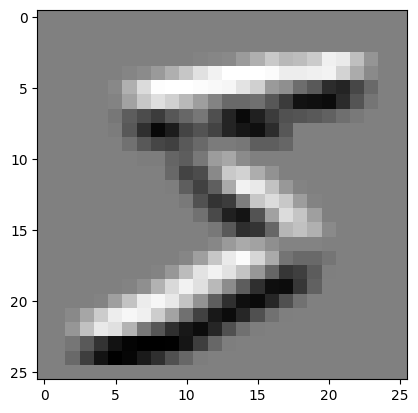

In [67]:
plt.imshow(filtered_im, cmap='gray')

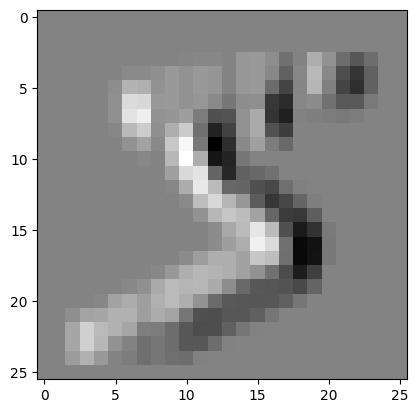

In [69]:
# left edge fillter
left_edge_fillter = torch.tensor([[-1,0,1],
                                  [-1, 0, 1], 
                                  [-1, 0, 1]])

filtered_im = apply_filter(im, left_edge_fillter)
plt.imshow(filtered_im, cmap='gray')

In [62]:
# それぞれのpixel値を表示する
df = pd.DataFrame(im)
df.style.format(precision=2).set_properties(**{'font-size':'7pt'}).background_gradient('Greys_r')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.07,0.07,0.07,0.49,0.53,0.69,0.10,0.65,1.00,0.97,0.50,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.12,0.14,0.37,0.60,0.67,0.99,0.99,0.99,0.99,0.99,0.88,0.67,0.99,0.95,0.76,0.25,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.19,0.93,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.98,0.36,0.32,0.32,0.22,0.15,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.86,0.99,0.99,0.99,0.99,0.99,0.78,0.71,0.97,0.95,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.31,0.61,0.42,0.99,0.99,0.80,0.04,0.00,0.17,0.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
